In [2]:
# IMPORT PACKAGES 

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import  Dropout,Dense
import numpy as np
from sklearn import metrics


In [3]:
#  DATA SELECTION 

dataframe=pd.read_csv("UNSW_NB15.csv")
print("====================================================")
print("                     Data Selection                 ")
print("====================================================")
print()
print(dataframe.head(15))
# PRE PROCESSING 

                     Data Selection                 

    id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0    1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1    2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2    3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3    4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4    5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   
5    6  0.380537   tcp       -   FIN     10      6     534     268  39.417980   
6    7  0.637109   tcp       -   FIN     10      8     534     354  26.683033   
7    8  0.521584   tcp       -   FIN     10      8     534     354  32.593026   
8    9  0.542905   tcp       -   FIN     10      8     534     354  31.313031   
9   10  0.258687   tcp       -   FIN     10      6     534     268  57.985135   
10  11  0.304853   tcp       -   FIN     12      6    4

In [4]:
#=  checking missing values 

print("====================================================")
print("            Handling Missing values                 ")
print("====================================================")
print()
print(dataframe.isnull().sum())

            Handling Missing values                 

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_

In [5]:
# label encoding 

label_encoder = preprocessing.LabelEncoder() 

print("====================================================")
print("              Before Label Encoding                 ")
print("====================================================")
print()
print(dataframe['attack_cat'].head(10))

              Before Label Encoding                 

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
5    Normal
6    Normal
7    Normal
8    Normal
9    Normal
Name: attack_cat, dtype: object


In [6]:
print("====================================================")
print("              After Label Encoding                  ")
print("====================================================")
print()

dataframe['attack_cat']= label_encoder.fit_transform(dataframe['attack_cat'])

print(dataframe['attack_cat'].head(10))

dataframe['proto']= label_encoder.fit_transform(dataframe['proto'])

dataframe['service']= label_encoder.fit_transform(dataframe['service'])

dataframe['state']= label_encoder.fit_transform(dataframe['state'])


              After Label Encoding                  

0    6
1    6
2    6
3    6
4    6
5    6
6    6
7    6
8    6
9    6
Name: attack_cat, dtype: int32


In [7]:
X=dataframe.drop(['label'],axis=1)
y=dataframe['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("===============================================")
print("             Data Splitting                    ")
print("===============================================")
print()

print("Total no of data        :",dataframe.shape[0])
print("Total no of test data   :",X_test.shape[0])
print("Total no of train data  :",X_train.shape[0])

             Data Splitting                    

Total no of data        : 175341
Total no of test data   : 35069
Total no of train data  : 140272


In [8]:
#  FEATURE EXTRACTION 

#  PCA 

from sklearn.decomposition import PCA

pca = PCA(n_components = 40)
 
X_train_pca = pca.fit_transform(X)


print("====================================================")
print("          Principle component Analysis              ")
print("====================================================")
print()
print(" The original features is :", X.shape[1])
print()
print(" The reduced feature is   :",X_train_pca.shape[1])
print()

          Principle component Analysis              

 The original features is : 44

 The reduced feature is   : 40



In [9]:
# CLASSIFICATION 

# LONG SHORT TERM MEMORY 

print("====================================================")
print("            Long Short Term Memory                  ")
print("====================================================")
print()

            Long Short Term Memory                  



In [13]:
# DIMENSION FITTING 

x=np.expand_dims(X_train, axis=2)
Y=np.expand_dims(y_train,axis=1)

In [14]:

#  MODEL INITIALIZATION 

model = Sequential()

# INPUT LAYER 

model.add(LSTM(input_shape=(44,1), kernel_initializer="uniform", return_sequences=True, stateful=False, units=50))
model.add(Dropout(0.2))

In [15]:
# HIDDEN LAYER 

model.add(LSTM(5, kernel_initializer="uniform", activation='relu',return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(3,kernel_initializer="uniform",activation='relu'))
model.add(Dense(1, activation='linear'))

In [16]:
# COMPILATION 

model.compile(loss="mae", optimizer='adam',metrics=['accuracy'])
model.summary()
print()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 44, 50)            10400     
                                                                 
 dropout_1 (Dropout)         (None, 44, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 5)                 1120      
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense (Dense)               (None, 3)                 18        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 11,542
Trainable params: 11,542
Non-trai

In [17]:
#=== FITTING ===

model.fit(x, Y, batch_size = 100, epochs = 2)

Evaluate=model.evaluate(x,Y,verbose=1)

y_pred1 = model.predict(x)

Epoch 1/2
1403/1403 [==============================] - 56s 37ms/step - loss: 0.2804 - accuracy: 0.7861
Epoch 2/2
4384/4384 [==============================] - 35s 8ms/step


In [18]:
#========================== PERFORMANCE ANALAYSIS ================================

#===== confusion matrix ======

print("====================================================")
print("             Performance Analysis for LSTM          ")
print("====================================================")
print()
accuracy1=Evaluate[1]*100
print("1.Accuracy:",accuracy1,'%')
print()

             Performance Analysis for LSTM          

1.Accuracy: 96.05623483657837 %



In [19]:
#==== RF ====

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 1)

lr.fit(X_train, y_train)

pred_lr=lr.predict(X_test)

print("====================================================")
print("             Performance Analysis for LR           ")
print("====================================================")
print()

acc=metrics.accuracy_score(pred_lr,y_test)*100

print("1.Accuracy:",acc,'%')
print()


             Performance Analysis for LR           

1.Accuracy: 88.05782885169238 %



In [20]:
#========================== PREDICTION ================================

print("====================================================")
print("                      Prediction                    ")
print("====================================================")
print()
for i in range(1,15):
    if pred_lr[i]== 0:
        print("==============")
        print()
        print([i],'Normal ')
    else:
        print("==============")
        print()
        print([i],'Cyber Attack ')


                      Prediction                    


[1] Cyber Attack 

[2] Cyber Attack 

[3] Cyber Attack 

[4] Cyber Attack 

[5] Cyber Attack 

[6] Cyber Attack 

[7] Cyber Attack 

[8] Cyber Attack 

[9] Cyber Attack 

[10] Cyber Attack 

[11] Cyber Attack 

[12] Cyber Attack 

[13] Normal 

[14] Cyber Attack 


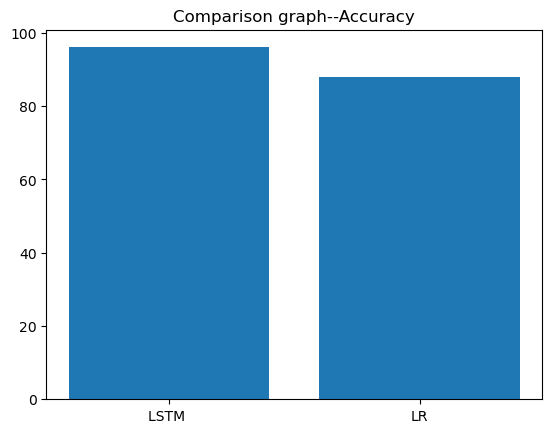

In [22]:


import matplotlib.pyplot as plt
vals=[accuracy1,acc]
inds=range(len(vals))
labels=["LSTM ","LR" ]
fig,ax = plt.subplots()
rects = ax.bar(inds, vals)
ax.set_xticks([ind for ind in inds])
ax.set_xticklabels(labels)
plt.title('Comparison graph--Accuracy')
plt.show() 
